In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import norm
from numpy.linalg import qr
from numpy.linalg import solve
from numpy.linalg import lstsq
import time
from scipy.linalg import lu
from scipy.optimize import minimize, rosen

# SIO 112: CH 4 examples

## Depth Age Example 

In [2]:
# load the data
data = pd.read_csv('../data/DepthAgeData_ch4.txt')   # exit current folder and change into data folder

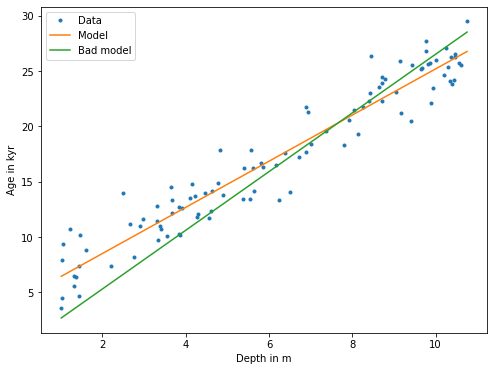

In [3]:
b = data.a
d = data.d

# find best fitting line
nd = len(d);
A = np.vstack([d,np.ones(nd)]).T     # 2x100 matrix
xopt = lstsq(A, b,rcond=None)[0]   # input A matrix 2x100 and b vector 100x1

# evaluate best fitting line
aOpt = xopt[0]*d+xopt[1]

## Model that neglects the offset
ABad = np.vstack([d]).T
xoptBad = lstsq(ABad,b,rcond=None)[0]
aOptBad = xoptBad*d

# plot the data
plt.figure(figsize=[8,6])
plt.plot(d,data.a,'.')
plt.xlabel('Depth in m')
plt.ylabel('Age in kyr')

# plot the optimal model
plt.plot(d,aOpt)
# plot the bad model
plt.plot(d,aOptBad)
plt.legend(['Data','Model','Bad model']);

## Poly Fit Example

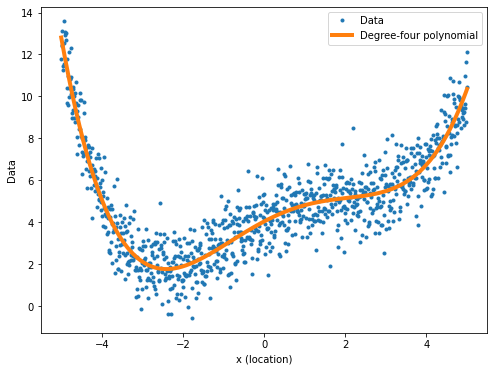

In [4]:
## load data
data = pd.read_csv('../data/PolyData.txt')
x = data.x
d = data.d

# plot data
plt.figure(figsize=[8,6])
plt.plot(x,d, '.')
plt.xlabel('x (location)')
plt.ylabel('Data');

# degree-four polynomial
nd = len(d)
A = np.vstack([x**4, x**3, x**2, x, np.ones(nd)]).T
p = lstsq(A,d,rcond=None)[0]
g = np.polyval(p,x);
plt.plot(x,g, linewidth=4)
plt.legend(['Data','Degree-four polynomial']);

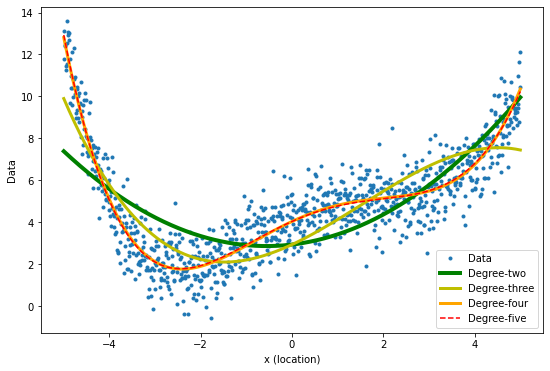

In [5]:
# plot data again
plt.figure(figsize=[9,6])
plt.plot(x,d, '.')
plt.xlabel('x (location)')
plt.ylabel('Data')

# degree-two polynomial
nd = len(d)
A = np.vstack([x**2, x, np.ones(nd)]).T
p = lstsq(A,d,rcond=None)[0]
g = np.polyval(p,x)
plt.plot(x,g, 'g',linewidth=4)

# degree-three polynomial
nd = len(d)
A = np.vstack([x**3, x**2, x, np.ones(nd)]).T
p = lstsq(A,d,rcond=None)[0]
g = np.polyval(p,x)
plt.plot(x,g,'y',linewidth=3)

# plot degree-four polynomial again
nd = len(d)
A = np.vstack([x**4, x**3, x**2, x, np.ones(nd)]).T
p = lstsq(A,d,rcond=None)[0]
g = np.polyval(p,x);
plt.plot(x,g,'orange',linewidth=3)

# degree-five polynomial
nd = len(d)
A = np.vstack([x**5, x**4, x**3, x**2, x, np.ones(nd)]).T
p = lstsq(A,d,rcond=None)[0]
g = np.polyval(p,x);
plt.plot(x,g,'--r')
plt.legend(['Data','Degree-two', 'Degree-three','Degree-four','Degree-five']);

## Circle Example

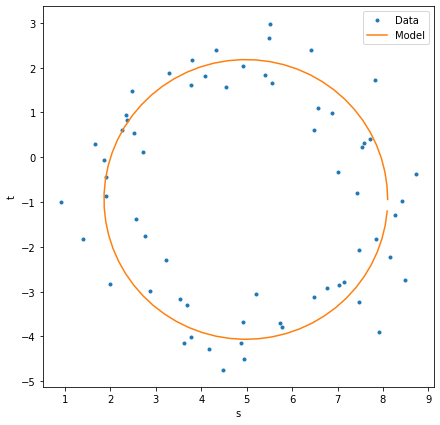

In [8]:
# load the data
data = pd.read_csv('../data/CircleData.txt')
s = data.s
t = data.t

# Least squares
nd = len(s)
A = np.vstack([2*s, 2*t, np.ones(nd)]).T
b = s**2 + t**2
x = lstsq(A,b,rcond=None)[0]
ms = x[0]
mt = x[1]
r = np.sqrt(x[2] + ms**2 + mt**2)

theta = np.arange(0, 2*np.pi, 0.1)
#theta = np.vstack([t_range, np.zeros(len(t_range))]).T
sModel = ms+r*np.cos(theta)
tModel = mt+r*np.sin(theta)

# plot data
plt.figure(figsize=[7,7])
plt.plot(s,t,'.')
plt.plot(sModel,tModel)
plt.xlabel('s')
plt.ylabel('t')
plt.legend(['Data','Model']);

## LS Numerics Demo

In [21]:
# domain
ds = 1e-2
s = (np.arange(2,4.01,ds)).T
m = len(s)

In [38]:
# data
b = 1 + s + s**2 + s**3 + s**4 + s**5 + s**6 + s**7

# matrix
A = np.vstack([np.ones(m), s, s**2, s**3, s**4, s**5, s**6, s**7]).T

In [39]:
# Canned routine
xLSc = np.linalg.solve(A,b)

LinAlgError: Last 2 dimensions of the array must be square

In [24]:
# Bad idea
xLSbad = np.linalg.solve( ( np.matmul(A.T*A) ), ( np.matmul(A.T,b) ) )

# QR
q,r = qr(A) 
xLSqr = np.linalg.solve(r, np.matmul(q.T*b) )

ValueError: operands could not be broadcast together with shapes (8,201) (201,8) 